# **LAB-05 REDES NEURONALES - REGRESIÓN LOGÍSTICA MULTICLASE** 

### Nombre: Gonzales Suyo Franz Reinaldo

### Carrera: Ing. de Sistemas

### C.U. 35-5335

# Implementación del modelo de regresión logística multiclase con una Red Neuronal

En este ejercicio implementaremos una red neuronal con regresion logistica multiclase y se aplica a dos diferentes datasets.

Nuestro objetuvo es predecir los número de label que son escritos del 0 al 9 en una imagen de 28x28 pixeles.
En el siguiente dataset **MNIST FGSM** `minist_train.csv` se encuentran todos los datos.

Link del Dataset: https://www.kaggle.com/datasets/sudulakishore/mnist-fgsm?select=mnist_train.csv

Link del Repositorio de GitHub LAB-04: https://github.com/Gonzales-Franz-Reinaldo/SIS420-AI/tree/main/Laboratorios/LAB-05

# **1. Preprocesamiento de los Datos**

## Información del Dataset

### MNIST FGSM

Un conjunto de datos similar al MNIST de 70.000 imágenes de 28 x 28 etiquetadas como Método de señalización de gradiente rápido


### Acerca del conjunto de datos

#### Contexto

MNIST-FGSM es un conjunto de datos de imágenes adversarias que consta de un conjunto de entrenamiento de 60.000 ejemplos y un conjunto de prueba de 10.000 ejemplos. Cada ejemplo es una imagen en escala de grises de 28x28, asociada a una etiqueta de 10 clases. MNIST-FGSM tiene la intención de servir como un reemplazo directo del conjunto de datos original de MNIST para la evaluación comparativa de algoritmos de aprendizaje automático en ejemplos antagónicos. Comparte el mismo tamaño de imagen y la misma estructura de las divisiones de entrenamiento y prueba.

El conjunto de datos original de MNIST contiene una gran cantidad de dígitos escritos a mano. A los miembros de la comunidad de IA/ML/Data Science les encanta este conjunto de datos y lo utilizan como punto de referencia para validar sus algoritmos. De hecho, MNIST suele ser el primer conjunto de datos que intentan los investigadores. "Si no funciona en el MNIST, no funcionará en absoluto", dijeron. "Bueno, si funciona en el MNIST, aún puede fallar en otros".

Compruebe la precisión de sus modelos en este conjunto de datos y mejore la solidez adversaria de los modelos

#### Contenido

Cada imagen tiene 28 píxeles de alto y 28 píxeles de ancho, para un total de 784 píxeles en total. Cada píxel tiene un único valor de píxel asociado, que indica la claridad u oscuridad de ese píxel, y los números más altos significan más oscuro. Este valor de píxel es un número entero entre 0 y 255. Los conjuntos de datos de entrenamiento y prueba tienen 785 columnas. La primera columna consta de las etiquetas de clase (ver arriba) y representa un número entero. El resto de las columnas contienen los valores de píxel de la imagen asociada.

Para ubicar un píxel en la imagen, supongamos que hemos descompuesto x como x = i * 28 + j, donde i y j son números enteros entre 0 y 27. El píxel se encuentra en la fila i y la columna j de una matriz de 28 x 28.
Por ejemplo, 31 indica el píxel que está en la cuarta columna desde la izquierda y la segunda fila desde la parte superior, como en el diagrama ascii a continuación.

#### Descripción

. De las columnas: Cada fila es una imagen

. independiente, la columna 1 es la etiqueta de la clase (enteros del 0 al 9).

. Las columnas restantes son números de píxeles (784 en total).

. Cada valor es la oscuridad del píxel (de 1 a 255)

## Importación de las Librerias

In [1]:

# Plotting library
from matplotlib import pyplot

# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
import matplotlib.pyplot as plt

import pandas as pd

# Modulo de optimización de scipy
from scipy import optimize

#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split

# para aumentar datos en un dataset
from collections import Counter
from imblearn.over_sampling import SMOTE

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 1.1 Obtención y Preparación de Datos:

In [3]:
# Obtenemos los datos 
df_train = pd.read_csv('./mnist_train.csv')
df_test = pd.read_csv('./mnist_test.csv')

# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)  # Mostrar todas las filas (60 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)

# Mostramos los datos de entrenamiento
df_train

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,5,25,25,25,24,24,25,25,25,25,17,13,25,25,25,23,1,9,25,25,25,25,25,25,17,0,15,25,25,25,25,25,12,12,24,25,25,25,25,25,25,25,25,25,20,9,25,25,25,20,25,25,25,15,1,20,25,25,25,25,12,0,20,25,25,25,25,25,25,25,25,25,20,5,16,16,23,1,16,18,25,25,9,20,25,25,25,25,12,8,22,13,25,25,25,25,25,15,24,12,10,0,0,0,20,1,0,2,12,19,9,10,24,25,25,25,12,16,25,1,25,25,25,25,25,19,28,0,0,4,12,11,9,47,33,29,10,12,9,0,8,25,25,25,22,23,9,0,5,5,5,24,47,55,74,28,39,86,111,103,52,173,209,172,115,42,21,4,0,25,25,25,25,25,24,1,28,48,31,74,151,199,240,239,240,235,233,228,200,247,252,199,101,39,25,24,1,23,25,25,24,24,24,26,70,175,212,218,221,223,227,226,253,255,231,149,110,67,42,65,36,25,23,25,3,1,20,21,15,18,9,0,10,154,204,212,226,227,216,159,189,218,188,74,36,37,0,4,21,10,0,20,20,0,0,5,20,25,18,1,3,61,103,122,210,236,162,33,26,58,70,19,12,16,0,0,0,0,0,12,1,0,0,0,6,12,2,0,0,5,18,53,175,248,137,0,0,3,8,2,0,0,0,0,0,0,0,0,11,16,12,0,0,0,0,0,0,0,0,38,143,238,201,36,0,0,0,0,0,0,0,0,0,0,0,0

In [4]:
# Datos de entrenamiento del 80% 
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']


# Datos del prueba del 20 % 
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

# Datos de X_train para el entrenamiento 
print("Datos de X_train")
print(X_train)

print('=' * 100)

print("Datos de y_train")
print(y_train)

# Mostramos la cantidad de ejemplos que se utilizaran para el entrenamiento
print('=' * 100)
print("Cantidad de ejemplos del 80% para el entrenamiento es de: {:.0f}".format(len(X_train)))
print("Cantidad de ejemplos del 20% para la prueba es de: {:.0f}".format(len(X_test)))

Datos de X_train
        0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  \
0      25  25  25  24  24  25  25  25  25  17  13  25  25  25  23   1   9  25   
1       1  24  25  25  25  25  25  25  20   0   0  16  25  25   1   5  24  12   
2       0   0   0   0   0   0   0   0   5  25  12   0   0   0   0   5  25  25   
3      25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  13   
4       0   0   0  11   8   0   0   1  18   1   0  16  25  25  25  20   9  23   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
23995  23   0   0  12  25  25  25  25  25  25  25   9  18  23  25  25  25  25   
23996  23  18   0  11  23  25  25  25  20   0   0  16   5   0   0   1  10  12   
23997  25  25  25  25   9   0   0   0   5  25  25  25  25  25  25  25  25  25   
23998  25  25  25  25  25  25  25  25  20   0   0   0   0   0   0   5  25  13   
23999  25  25  25  12   0   0   0   0   0   9  13   0   0   0   0   0   0   0   

       18 

In [5]:
# Mostramos cuantas clases tinene la columna de "Y" labels
df_train['label'].value_counts()

label
1    2732
7    2489
3    2487
9    2411
0    2381
6    2370
4    2347
2    2347
8    2292
5    2144
Name: count, dtype: int64

In [6]:
# Mostramos los datos de entrenamiento X_train
print("Datos de entrenamiento")
X_train

Datos de entrenamiento


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,25,25,25,24,24,25,25,25,25,17,13,25,25,25,23,1,9,25,25,25,25,25,25,17,0,15,25,25,25,25,25,12,12,24,25,25,25,25,25,25,25,25,25,20,9,25,25,25,20,25,25,25,15,1,20,25,25,25,25,12,0,20,25,25,25,25,25,25,25,25,25,20,5,16,16,23,1,16,18,25,25,9,20,25,25,25,25,12,8,22,13,25,25,25,25,25,15,24,12,10,0,0,0,20,1,0,2,12,19,9,10,24,25,25,25,12,16,25,1,25,25,25,25,25,19,28,0,0,4,12,11,9,47,33,29,10,12,9,0,8,25,25,25,22,23,9,0,5,5,5,24,47,55,74,28,39,86,111,103,52,173,209,172,115,42,21,4,0,25,25,25,25,25,24,1,28,48,31,74,151,199,240,239,240,235,233,228,200,247,252,199,101,39,25,24,1,23,25,25,24,24,24,26,70,175,212,218,221,223,227,226,253,255,231,149,110,67,42,65,36,25,23,25,3,1,20,21,15,18,9,0,10,154,204,212,226,227,216,159,189,218,188,74,36,37,0,4,21,10,0,20,20,0,0,5,20,25,18,1,3,61,103,122,210,236,162,33,26,58,70,19,12,16,0,0,0,0,0,12,1,0,0,0,6,12,2,0,0,5,18,53,175,248,137,0,0,3,8,2,0,0,0,0,0,0,0,0,11,16,12,0,0,0,0,0,0,0,0,38,143,238,201,36,0,0,0,0,0,0,0,0,0,0,0,0,8,25,24

In [7]:
# Imprimos todas las clases o labels que contiene la columna de y_train
from collections import Counter

num_clases = len(np.unique(y_train))
print("Número de clases:", num_clases)


# Conteo de datos por clase
conteo_clases = dict(Counter(y_train))

# Imprimir el conteo de datos por clase
print("Clases podrían ser:")
for clase, conteo in conteo_clases.items():
    print(f"{clase} : {conteo} datos")

Número de clases: 10
Clases podrían ser:
5 : 2144 datos
0 : 2381 datos
4 : 2347 datos
1 : 2732 datos
9 : 2411 datos
2 : 2347 datos
3 : 2487 datos
6 : 2370 datos
7 : 2489 datos
8 : 2292 datos


## **2. Visualización de los Datos**

In [8]:

def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una bonita cuadrícula.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n // example_width  # Cambié esto a división entera

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = plt.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        # Display Image
        h = ax.imshow(X.iloc[i].values.reshape(example_width, example_width),
                      cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')


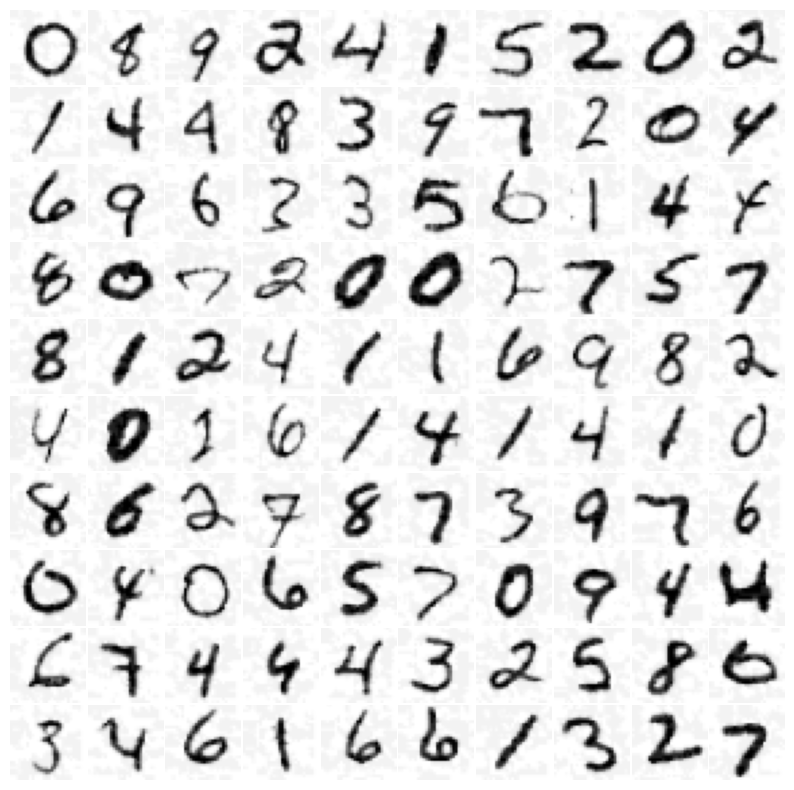

In [9]:
# Número de ejemplos de entrenamiento
m = y_train.size
# Se seleccionan 100 datos para ser visualizados
rand_indices = np.random.choice(m, 100, replace=False)
sel = X_train.iloc[rand_indices, :]  # Corregí aquí utilizando iloc
displayData(sel)
plt.show()

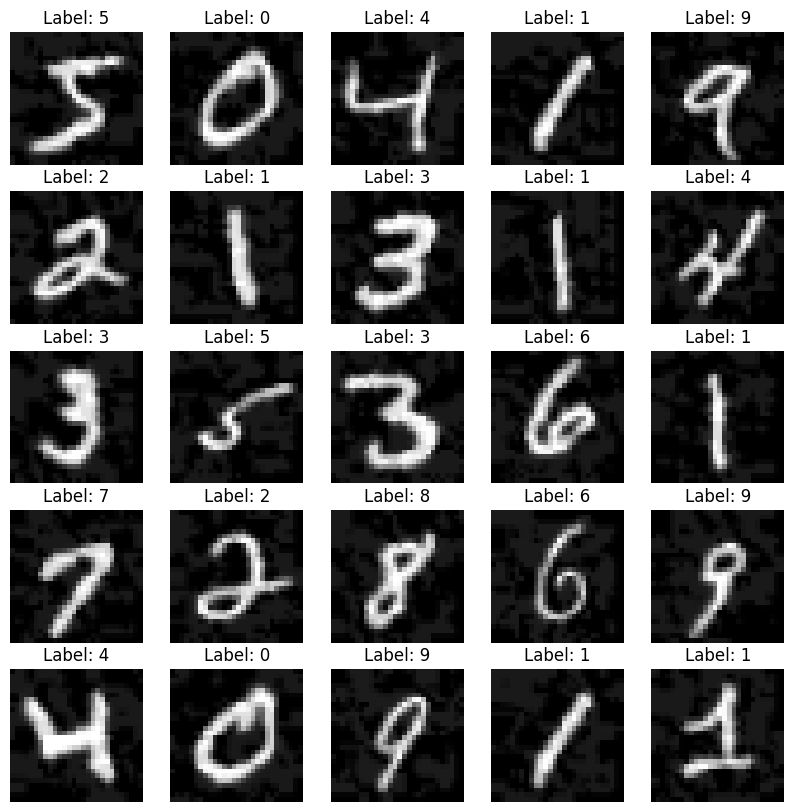

In [10]:
# Visualizar algunas imágenes
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y_train.iloc[i]}')
    plt.axis('off')
plt.show()

## **3. Construcción del Modelo de Red Neuronal**

### 3.1 Definición de Capas

La red neuronal tiene 3 capas: una capa de entrada, una capa oculta y una capa de salida. Las entradas son valores de píxeles de digitos de imagenes. Dado que las imágenes tienen un tamaño de $28 \times 28$, esto nos da 784 unidades de capa de entrada (sin contar la unidad de oscilación adicional que siempre genera +1). Los datos de entrenamiento se cargaron en las variables `X` y `y` anteriores.

Los parámetros tienen dimensiones que están dimensionadas para una red neuronal con 25 unidades en la segunda capa y 10 unidades de salida (correspondientes a las clases de 10 dígitos ya que van de 0 a 9).

In [11]:
print("X_train shape:", X_train.shape)

X_train shape: (24000, 784)


In [12]:
# Contrucción del modelo de red neuronal
# Configuración de parámetros necesario
input_layer_size  = 784  # Entrada de imagenes de digitos de 28x28, caracteristicas
hidden_layer_size = 25   # 25 hidden units, neuronas ocultas, capa uculta
num_labels = 10         # 10 etiquetas, labels del 0 al 9


# carga los pesos en las variables Theta1 y Theta2
pesos = {}
pesos['Theta1'] = np.random.rand(hidden_layer_size, input_layer_size + 1) # 25, 785
pesos['Theta2'] = np.random.rand(num_labels, hidden_layer_size + 1)  # 10, 26

Theta1 = pesos['Theta1']
Theta2 = pesos['Theta2']

# Desenrollar parámetros
print(Theta1.ravel().shape)  # ravel() para convertir los pesos de una matriz a un vector
print(Theta2.ravel().shape)

nn_params = np.concatenate([Theta1.ravel(), Theta2.ravel()])
print(nn_params.shape)

(19625,)
(260,)
(19885,)


### 3.2 Función de Activación

La principal diferencia es que, en el modelo de `regresión logísitca`, utilizaremos una función de activación conocida como `Sigmoid`.

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

In [13]:
# Función de activación 
def sigmoid(z):
    """
    Computes the sigmoid of z.
    """
    return 1.0 / (1.0 + np.exp(-z))


def sigmoidGradient(z):

    g = np.zeros(z.shape)

    g = sigmoid(z) * (1 - sigmoid(z))

    return g

### 3.3 Función de Pérdida (Costo) y Descenso del Gradiente

Podríamos intentar entrenar nuestro modelo de `regresión logísitca multiclase` con la función de pérdida que ya conocemos. Sin embargo. Esta función es conocida como *Cross Entropy*.

Ahora se implementa la funcion de costo y gradiente para la red neuronal `nnCostFunction`.

La función de costo para la red neuronal (con regularización) es:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}\sum_{k=1}^{K} \left[ - y_k^{(i)} \log \left( \left( h_\theta \left( x^{(i)} \right) \right)_k \right) - \left( 1 - y_k^{(i)} \right) \log \left( 1 - \left( h_\theta \left( x^{(i)} \right) \right)_k \right) \right] + \frac{\lambda}{2 m} \left[ \sum_{j=1}^{25} \sum_{k=1}^{400} \left( \Theta_{j,k}^{(1)} \right)^2 + \sum_{j=1}^{10} \sum_{k=1}^{25} \left( \Theta_{j,k}^{(2)} \right)^2 \right] $$

In [14]:
# Definimos la función 
# Esta función calcula la función de costo y los gradientes para una red neuronal de dos capas (una capa oculta) 
# utilizada en un problema de regresión logística multiclase.

def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_):
    
    # Reformar nn_params nuevamente en los parámetros Theta1 y Theta2, las matrices de peso
    # para nuestra red neuronal de 2 capas
    
    #? Los primeros 150 elementos de nn_params se utilizan para llenar la matriz Theta1, 
    # que tendrá dimensiones 25 x 785 (25 filas y 785 columnas).
    Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                        (hidden_layer_size, (input_layer_size + 1)))
    
    #? Los elementos apartir de 155 de nn_params se utilizan para llenar la matriz Theta2, 
    # entonces 260 elementos que tendrá dimensiones 10 x 26 (10 filas y 26 columnas.
    Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                        (num_labels, (hidden_layer_size + 1)))
    
    m = y.size
    
    J = 0
    
    #? Inicializamos matrices para almacenar los gradientes
    Theta2_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    
    a1 = np.concatenate([np.ones((m, 1)), X], axis=1)
    
    a2 = sigmoid(a1.dot(Theta1.T))
    a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)
    
    a3 = sigmoid(a2.dot(Theta2.T))
    
    y_matrix = y.reshape(-1)
    y_matrix = np.eye(num_labels)[y_matrix]
    
    temp1 = Theta1
    temp2 = Theta2
    
    
    #? Calculo de la función de costo con termino de regularización
    
    regularizacion = (lambda_ / (2 * m)) * (np.sum(np.square(temp1[:, 1:])) + np.sum(np.square(temp2[:, 1:])))
    
    J = (-1 / m) * np.sum((y_matrix * np.log(a3)) + (1 - y_matrix) * np.log(1 - a3)) + regularizacion
    
    
    #? Backpropagation
    
    # calcula el error en la capa de salida.
    delta_3 = a3 - y_matrix 
    # calcula el error en la capa oculta propagando hacia atrás el error desde la capa de salida.
    delta_2 = delta_3.dot(Theta2)[:, 1:] * sigmoidGradient(a1.dot(Theta1.T))
    
    # Acumuladores de los gradientes de los pesos Theta1 y Theta2 respectivamente.
    Delta1 = delta_2.T.dot(a1)
    Delta2 = delta_3.T.dot(a2)
    
    # Agregar regularización al gradiente
    
    Theta1_grad = (1 / m) * Delta1
    Theta1_grad[:, 1:] = Theta1_grad[:, 1:] + (lambda_ / m) * Theta1[:, 1:]
    
    Theta2_grad = (1 / m) * Delta2
    Theta2_grad[:, 1:] = Theta2_grad[:, 1:] + (lambda_ / m) * Theta2[:, 1:]
    
    # Toodas las gradientes
    
    grad = np.concatenate([Theta1_grad.ravel(), Theta2_grad.ravel()])
    
    return J, grad


#### Pruebando el funcionamiento de la función de costo 

In [15]:
lambda_ = 0.1

J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,  num_labels, X_train, y_train.values, lambda_)
print("Costo en parámetros (Cargado): %.f " % J)
print('El costo debe esta cercano a          : 0.287629')

Costo en parámetros (Cargado): 112 
El costo debe esta cercano a          : 0.287629


### Inicializamso la función para inicializar los pesos 

La función randInitializeWeights se utiliza para inicializar aleatoriamente los pesos de una capa en una red neuronal. Esta inicialización aleatoria es crucial para evitar que todos los pesos comiencen con el mismo valor y se sincronicen durante el entrenamiento, lo que puede llevar a problemas de simetría y convergencia inadecuada durante el aprendizaje.

In [16]:
# Inicializamos los pesos de la red neuronal de forma aleatoria utilizando la función randInitializeWeights
def randInitializeWeights(L_in, L_out, epsilon_init = 0.12):
    
    """
        Inicializa aleatoriamente los pesos de una capa en una red neuronal.

        Parámetros
        ----------
        L_in:int
        Número de conexiones entrantes.

        L_salida: int
        Número de conexiones salientes.

        epsilon_init: flotante, opcional
        Rango de valores que puede tomar el peso de un uniforme
        distribución.

        Devoluciones
        -------
        W: tipo matriz
        El peso inicializado a valores aleatorios. Tenga en cuenta que W debería
        establecerse en una matriz de tamaño (L_out, 1 + L_in) como
        la primera columna de W maneja los términos de "sesgo".
    """
    
    """
    . Se crea una matriz W de dimensiones (L_out, 1 + L_in) inicializada con ceros.
    . L_out: representa el número de neuronas en la capa actual (conexiones salientes).
    . 1 + L_in: se refiere al número de entradas a cada neurona, incluyendo un término de "sesgo" (bias) que corresponde a la primera columna de la matriz W.
    """
    
    # Creamos una matriz con las dimensiones 
    W = np.zeros((L_out, 1 + L_in))
    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init
    
    return W

In [17]:
# Llamamos a la funcion para inicializar los thetas aleatoriamente
print("Inicialización de parámetros de redes neuronales...")

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

# Desenrrollar parámetos
initial_nn_params = np.concatenate([initial_Theta1.ravel(), initial_Theta2.ravel()], axis=0)

Inicialización de parámetros de redes neuronales...


## 3.4 Backpropagation

Ahora, se implementará el algoritmo de retropropagación. Recuerde que la intuición detrás del algoritmo de retropropagación es la siguiente. Dado un ejemplo de entrenamiento $(x^{(t)}, y^{(t)})$, primero ejecutaremos un "pase hacia adelante" para calcular todas las activaciones en toda la red, incluido el valor de salida de la hipótesis $h_\theta(x)$. Luego, para cada nodo $j$ en la capa $l$, se busca calcular un "término de error" $\delta_j^{(l)}$ que mide cuánto ese nodo fue "responsable" de cualquier error en la salida.

### 3.4  Comprobación del gradiente

En la red neuronal, se está minimizando la función de costo $J(\Theta)$. Para realizar una verificación de gradiente en sus parámetros, se puede imaginar "desenrollar" los parámetros $\Theta^{(1)}$, $\Theta^{(2)}$ en un vector largo $\theta$. Al hacerlo, se puede pensar que la función de costo es $J(\Theta)$ y usar el siguiente procedimiento de verificación de gradiente.


** Consejo práctico **: al realizar la verificación de gradientes, es mucho más eficiente utilizar una pequeña red neuronal con un número relativamente pequeño de unidades de entrada y unidades ocultas, por lo que tiene un número relativamente pequeño
de parámetros. Cada dimensión de $\theta$ requiere dos evaluaciones de la función de costo y esto puede resultar costoso. En la función `checkNNGradients`, nuestro código crea un pequeño modelo aleatorio y un conjunto de datos que se usa con `computeNumericalGradient` para verificar el gradiente. Además, una vez que esté seguro de que sus cálculos de gradiente son correctos, debe desactivar la verificación de gradiente antes de ejecutar su algoritmo de aprendizaje.


** Sugerencia práctica: ** La verificación del gradiente funciona para cualquier función en la que esté calculando el costo y el gradiente. Concretamente, puede usar la misma función `computeNumericalGradient` para verificar si sus implementaciones de gradiente para los otros ejercicios también son correctas (por ejemplo, la función de costo de regresión logística).

In [18]:
#? Function para depurar Inicializar pesos
def debugInitializeWeights(fan_out, fan_in):
    """
    Inicializar los pesos de una capa con conexiones entrantes fan_in y salidas fan_out
    conexiones usando una estrategia fija. Esto le ayudará más adelante en la depuración.

    Tenga en cuenta que W debe establecerse como una matriz de tamaño (1+fan_in, fan_out) como la primera fila de W maneja
    los términos de "sesgo".

    Parámetros
    ----------
    fan_out: int
    El número de conexiones salientes.

    fan_in: int
    El número de conexiones entrantes.

    Devoluciones
    -------
    W: array_like (1+fan_in, fan_out)
    La matriz de pesos inicializada dadas las dimensiones.
    """
    # Initialize W using "sin". This ensures that W is always of the same values and will be
    # useful for debugging
    W = np.sin(np.arange(1, 1 + (1+fan_in)*fan_out))/10.0
    W = W.reshape(fan_out, 1+fan_in, order='F')
    
    return W


#? Función para calcular gradiente numérico
def computeNumericalGradient(J, theta, e=1e-4):
    """
    Calcula el gradiente usando "diferencias finitas" y nos da una estimación numérica del
    degradado.

    Parámetros
    ----------
    J: función
    La función de costo que se utilizará para estimar su gradiente numérico.

    theta: tipo matriz
    Los parámetros de red unidimensionales desenrollados. El gradiente numérico se calcula en
    esos parámetros dados.

    e: flotante (opcional)
    El valor que se utilizará para épsilon para calcular la diferencia finita.

    Notas
    -----
    El siguiente código implementa la verificación de gradiente numérico y
    devuelve el gradiente numérico. Establece `numgrad[i]` en (un valor numérico
    aproximación de) la derivada parcial de J con respecto a la
    i-ésimo argumento de entrada, evaluado en theta. (es decir, `numgrad[i]` debería
    ser (aproximadamente) la derivada parcial de J con respecto
    a theta[i].)
    """
    numgrad = np.zeros(theta.shape)
    perturb = np.diag(e * np.ones(theta.shape))
    for i in range(theta.size):
        loss1, _ = J(theta - perturb[:, i])
        loss2, _ = J(theta + perturb[:, i])
        numgrad[i] = (loss2 - loss1)/(2*e)
        
    return numgrad


#? Función para comprobar gradientes NN
def checkNNGradients(nnCostFunction, lambda_=0):
    """
    Crea una pequeña red neuronal para comprobar los gradientes de retropropagación. Dará salida al
    gradientes analíticos producidos por su código backprop y los gradientes numéricos
    (calculado usando ComputeNumericalGradient). Estos dos cálculos de gradiente deberían dar como resultado
    valores muy similares.

    Parámetros
    ----------
    nnCostoFunción: func
    Una referencia a la función de costos implementada por el estudiante.

    lambda_: flotante (opcional)
    El valor del parámetro de regularización.
    """
    input_layer_size = 784
    hidden_layer_size = 25
    num_labels = 10
    m = 25

    # We generate some 'random' test data
    Theta1 = debugInitializeWeights(hidden_layer_size, input_layer_size)
    Theta2 = debugInitializeWeights(num_labels, hidden_layer_size)

    # Reusing debugInitializeWeights to generate X
    X = debugInitializeWeights(m, input_layer_size - 1)
    y = np.arange(1, 1+m) % num_labels
    # print(y)
    # Unroll parameters
    nn_params = np.concatenate([Theta1.ravel(), Theta2.ravel()])

    # short hand for cost function
    costFunc = lambda p: nnCostFunction(p, input_layer_size, hidden_layer_size,
                                        num_labels, X, y, lambda_)
    cost, grad = costFunc(nn_params)
    numgrad = computeNumericalGradient(costFunc, nn_params)

    # Visually examine the two gradient computations.The two columns you get should be very similar.
    print(np.stack([numgrad, grad], axis=1))
    print('Las dos columnas anteriores que obtenga deberían ser muy similares.')
    print('(Izquierda: su gradiente numérico, gradiente analítico derecho)\n')

    # Evaluate the norm of the difference between two the solutions. If you have a correct
    # implementation, and assuming you used e = 0.0001 in computeNumericalGradient, then diff
    # should be less than 1e-9.
    diff = np.linalg.norm(numgrad - grad)/np.linalg.norm(numgrad + grad)

    print('Si su implementación de retropropagación es correcta, entonces \n'
          'la diferencia relativa será pequeña (menos de 1e-9).. \n'
          'Diferencia relativa: %g' % diff)


In [19]:
# Realizamos la prueba de la función 
checkNNGradients(nnCostFunction)

[[-3.41635729e-03 -3.41635729e-03]
 [ 1.63813585e-05  1.63813594e-05]
 [ 6.49492904e-06  6.49492284e-06]
 ...
 [ 2.11272717e-01  2.11272717e-01]
 [ 2.15864979e-01  2.15864979e-01]
 [ 2.08077268e-01  2.08077268e-01]]
Las dos columnas anteriores que obtenga deberían ser muy similares.
(Izquierda: su gradiente numérico, gradiente analítico derecho)

Si su implementación de retropropagación es correcta, entonces 
la diferencia relativa será pequeña (menos de 1e-9).. 
Diferencia relativa: 8.83071e-11


Un ejemplo de forma regularizada

In [20]:
# Verificamos los gradientes ejecutando checkNNGradients
lambda_ = 3
checkNNGradients(nnCostFunction, lambda_)

# También genera los valores de depuración de costFunction
debug_J, _  = nnCostFunction(nn_params, input_layer_size,
                          hidden_layer_size, num_labels, X_train, y_train.values, lambda_)

print('\n\nCosto en parámetros de depuración (fijos) (w/ lambda = %f): %f ' % (lambda_, debug_J))
print('(for lambda = 3, this value should be about 0.576051)')

[[-0.00341636 -0.00341636]
 [ 0.00916708  0.00916708]
 [ 0.00804925  0.00804925]
 ...
 [ 0.22261806  0.22261806]
 [ 0.20421864  0.20421864]
 [ 0.21627614  0.21627614]]
Las dos columnas anteriores que obtenga deberían ser muy similares.
(Izquierda: su gradiente numérico, gradiente analítico derecho)

Si su implementación de retropropagación es correcta, entonces 
la diferencia relativa será pequeña (menos de 1e-9).. 
Diferencia relativa: 1.32418e-10


Costo en parámetros de depuración (fijos) (w/ lambda = 3.000000): 112.091701 
(for lambda = 3, this value should be about 0.576051)


## **4. Entrenamiento del Modelo**

In [22]:
# Entrenamiento del modelo 

# Después de haber completado la tarea, cambie el maxiter a uno más grande
#? valor para ver cómo ayuda más formación.
# Especifica el número máximo de iteraciones que el algoritmo de optimización 
options = {'maxiter': 100}

#? Probar con diferentes valores de lambda
lambda_ = 1

#? Cree una "taquigrafía" para minimizar la función de costos.
#? Ahora, costFunction es una función que toma solo un argumento.
costFunction = lambda p: nnCostFunction(p, input_layer_size, 
                                        hidden_layer_size, 
                                        num_labels, X_train.values, y_train.values, lambda_)

#? Ahora, costFunction es una función que toma solo un argumento.
#? (los parámetros de la red neuronal)

res = optimize.minimize(costFunction,
                        initial_nn_params,
                        jac=True,
                        method='TNC',
                        options=options)

#? obtenemos la solución de la optimización
nn_params = res.x

#? Obtenemos Theta1 y Theta2 de nn_params
Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                    (hidden_layer_size, (input_layer_size + 1)))

Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                    (num_labels, (hidden_layer_size + 1)))

C:\Users\gonza\AppData\Local\Temp\ipykernel_13428\962819663.py:20: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,
C:\Users\gonza\AppData\Local\Temp\ipykernel_13428\3350358744.py:6: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


KeyboardInterrupt: 